# Preparing the data for the analysis

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [2]:
# This cell stores the variables for the rest of the script, so it is easier to change if needed
data_file_path = '../../../results/final.nc'

First, we have to load the data that came as an output of the model. Variables of interest are stored in a netcdf file (.nc), that we will load as a dataset, and convert to a pandas dataframe. 

In [3]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'extra_extra_gdp_modifyer',
       'total_radiative_forcing', 
       'gross_domestic_product_nominal', 'population_35_regions', 
       'average_disposable_income_per_capita']

damage_variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_total_damage',
       'fund_tot_eq_fund_total_impact', 'witness_tot_eq_witness_total_impact']      

ds = xr.open_dataset(data_file_path)
df = ds[variables].to_dataframe().reset_index()
df = df.rename(columns={'extra_extra_gdp_modifyer': 'coef'})


c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


We now have a dataframe : 

In [4]:
ds

<xarray.Dataset> Size: 1MB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            VINTAGING ANNUAL: 10,
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                            pprofile: 4,
                                                                            upper: 3,
                                                                            time: 66)
Coordinates: (12/254)
  * A MATRIX YEARS I                                                       (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                                  (AEZ I) <U13 208B ...
  * AGE ADULTS I                                                           (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                                            (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                                     (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                                      (AGE CHAIN YOUNG I) <U6 360B ...
    ...                                                                     ...
  * VINTAGING ANNUAL                                                       (VINTAGING ANNUAL) <U3 120B ...
  * bottom                                                                 (bottom) <U6 24B ...
  * lower                                                                  (lower) <U6 72B ...
  * pprofile                                                               (pprofile) <U9 144B ...
  * upper                                                                  (upper) <U6 72B ...
  * time                                                                   (time) float64 528B ...
Data variables: (12/174)
    define_46_eq_damage_function                                           (time) float64 528B ...
    define_tot_eq_define_total_impact                                      (time, REGIONS 35 I) float64 18kB ...
    dice_5_eq_damage_function                                              (time) float64 528B ...
    dice_tot_eq_dice_total_impact                                          (time, REGIONS 35 I) float64 18kB ...
    dsk_tot_eq_dsk_total_impact                                            (time, REGIONS 35 I) float64 18kB ...
    extra_extra_gdp_modifyer                                               (time, REGIONS 35 I) float64 18kB ...
    ...                                                                     ...
    fund_w1_tau_parameter                                                  float64 8B ...
    fund_extra_initial_revenue                                             (REGIONS 35 I) float64 280B ...
    fund_extra_initial_gdp                                                 (REGIONS 35 I) float64 280B ...
    fund_extra_initial_population                                          (REGIONS 35 I) float64 280B ...
    switch_wiliam_amoc_change                                              float64 8B ...
    witness_epsilon                                                        float64 8B ...
Attributes: (5)

In [5]:
df

,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,coef,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,average_disposable_income_per_capita
0,2005.0,AUSTRIA,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,0.000000e+00,0.845000,6.541007e+09,0.845784,47058.691018,0.000000,1.714491,3.786850e+05,8.253656e+06,0.000000
1,2005.0,BELGIUM,5.454717e+02,6.589308e+02,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,1.113383e+03,0.845000,6.541007e+09,0.845784,47058.691018,0.581072,1.714491,4.580816e+05,1.054688e+07,24767.399895
2,2005.0,BULGARIA,1.333681e+01,1.611090e+01,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,2.722228e+01,0.845000,6.541007e+09,0.845784,47058.691018,0.131897,1.714491,4.934207e+04,7.686964e+06,4290.060541
3,2005.0,CROATIA,2.156579e+01,2.605151e+01,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,4.401876e+01,0.845000,6.541007e+09,0.845784,47058.691018,0.213121,1.714491,4.937873e+04,4.378066e+06,7565.730576
4,2005.0,CYPRUS,1.597244e+01,1.929474e+01,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,3.260196e+01,0.845000,6.541007e+09,0.845784,47058.691018,0.384869,1.714491,2.025158e+04,1.027657e+06,15217.411656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2070.0,INDIA,1.228404e+06,4.315271e+05,0.0,1.607147e+10,2.450342e+04,1.607147e+10,2.731320e+05,7.899529e+05,2.616576,7.951395e+09,-0.173258,42595.512443,1.867694,4.815545,9.733785e+06,1.466325e+09,1157.322384
2306,2070.0,LATAM,9.009562e+05,3.164976e+05,0.0,2.795619e+10,5.413175e+03,2.795619e+10,1.978939e+06,5.793800e+05,2.616576,7.951395e+09,-0.173258,42595.512443,1.290907,4.815545,1.032892e+07,3.860440e+08,9756.778132
2307,2070.0,RUSSIA,2.569771e+06,9.027366e+05,0.0,3.430470e+10,4.108066e+02,3.430470e+10,4.316856e+07,1.652548e+06,2.616576,7.951395e+09,-0.173258,42595.512443,0.755472,4.815545,5.034102e+07,1.320865e+08,214909.727770
2308,2070.0,USMCA,7.197711e+06,2.528489e+06,0.0,1.100420e+11,3.580084e+03,1.100420e+11,3.077153e+07,4.628649e+06,2.616576,7.951395e+09,-0.173258,42595.512443,0.801547,4.815545,1.328959e+08,4.450942e+08,152707.707403


### Cleaning the dataset from coef outliers

We now compute the spatial equity coefficient, which takes the form : 

$$ \text{coef} = (\frac{y_{t,r}}{y_0})^\beta $$

<Axes: xlabel='gross_domestic_product_nominal', ylabel='coef'>

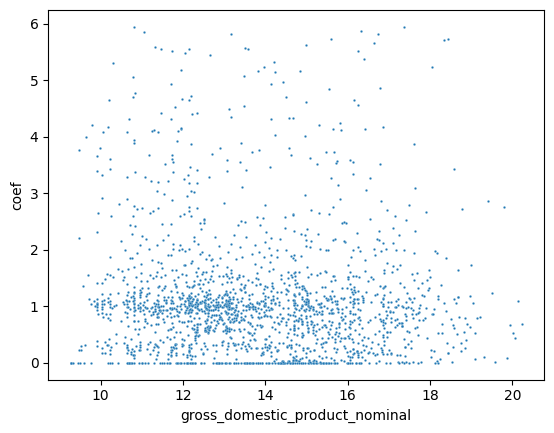

In [6]:
sns.scatterplot(data=df[df['coef']<6], y='coef', x=np.log(df['gross_domestic_product_nominal']), s=3)

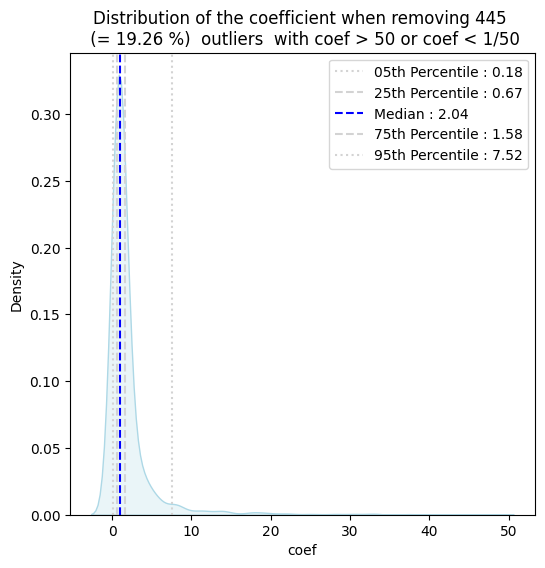

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

original_shape = df.shape[0]
coef_threshold = 50
df_outliers = df[(df['coef'] > coef_threshold) | (df['coef'] < 1/coef_threshold)]
df_no_outliers = df[(df['coef'] < coef_threshold) & (df['coef'] > 1/coef_threshold)]
sns.kdeplot(data=df_no_outliers, x='coef', ax=ax, color='lightblue', fill=True)

plt.axvline(df_no_outliers['coef'].quantile(0.05), color='lightgrey', linestyle='dotted', label=f'05th Percentile : {df_no_outliers["coef"].quantile(0.05):.2f}')
plt.axvline(df_no_outliers['coef'].quantile(0.25), color='lightgrey', linestyle='--', label=f'25th Percentile : {df_no_outliers["coef"].quantile(0.25):.2f}')
plt.axvline(df_no_outliers['coef'].median(), color='blue', linestyle='--', label=f'Median : {df_no_outliers["coef"].mean():.2f}')
plt.axvline(df_no_outliers['coef'].quantile(0.75), color='lightgrey', linestyle='--', label=f'75th Percentile : {df_no_outliers["coef"].quantile(0.75):.2f}')
plt.axvline(df_no_outliers['coef'].quantile(0.95), color='lightgrey', linestyle='dotted', label=f'95th Percentile : {df_no_outliers["coef"].quantile(0.95):.2f}')



plt.title(f'Distribution of the coefficient when removing {df_outliers.shape[0]} \n (= {100*df_outliers.shape[0]/original_shape:.2f} %)  outliers  with coef > {coef_threshold} or coef < 1/{coef_threshold}')
plt.legend()
plt.show()

In [8]:
df_no_outliers.columns

Index(['time', 'REGIONS 35 I', 'define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'temperature_change',
       'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'coef', 'total_radiative_forcing',
       'gross_domestic_product_nominal', 'population_35_regions',
       'average_disposable_income_per_capita'],
      dtype='object')

In [9]:
variables_to_show = ['coef', 'temperature_change']

description_table = df_no_outliers[variables_to_show].describe()

latex_table = description_table.to_latex()

with open('../../../../Memoire/results/description_table.tex', 'w') as f:
    f.write(latex_table)

description_table

,coef,temperature_change
count,1865.000000,1865.000000
mean,2.039068,1.661358
std,3.983521,0.523274
min,0.021691,0.845000
25%,0.672309,1.198624
50%,1.027231,1.634714
75%,1.582395,2.090832
max,47.991522,2.616576


We need to have all the damages in the same column to process to the regression : 

In [10]:
df_melted = df_no_outliers.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'coef', 'temperature_change', 'gross_domestic_product_nominal', 'average_disposable_income_per_capita'], var_name='equation',  value_vars=damage_variables, value_name='damage')

# Removing outliers equations 
df_melted = df_melted[~df_melted['equation'].isin(['fund_tot_total_damage', 'fund_tot_eq_fund_total_impact', 'fund_tot_eq_monetary_impact', 'dsk_tot_eq_dsk_total_impact'])] 

# Drop infinite values
infinites = df_melted[(df_melted['damage'] == np.inf) | (df_melted['damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)

df_melted


,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,damage
0,2005.0,BELGIUM,0.845784,47058.691018,1.714491,0.581072,0.845000,4.580816e+05,24767.399895,define_tot_eq_define_total_impact,5.454717e+02
1,2005.0,BULGARIA,0.845784,47058.691018,1.714491,0.131897,0.845000,4.934207e+04,4290.060541,define_tot_eq_define_total_impact,1.333681e+01
2,2005.0,CROATIA,0.845784,47058.691018,1.714491,0.213121,0.845000,4.937873e+04,7565.730576,define_tot_eq_define_total_impact,2.156579e+01
3,2005.0,CYPRUS,0.845784,47058.691018,1.714491,0.384869,0.845000,2.025158e+04,15217.411656,define_tot_eq_define_total_impact,1.597244e+01
4,2005.0,CZECH REPUBLIC,0.845784,47058.691018,1.714491,0.270972,0.845000,1.862598e+05,10050.031677,define_tot_eq_define_total_impact,1.034293e+02
...,...,...,...,...,...,...,...,...,...,...,...
13050,2070.0,INDIA,-0.173258,42595.512443,4.815545,1.867694,2.616576,9.733785e+06,1157.322384,witness_tot_eq_witness_total_impact,7.899529e+05
13051,2070.0,LATAM,-0.173258,42595.512443,4.815545,1.290907,2.616576,1.032892e+07,9756.778132,witness_tot_eq_witness_total_impact,5.793800e+05
13052,2070.0,RUSSIA,-0.173258,42595.512443,4.815545,0.755472,2.616576,5.034102e+07,214909.727770,witness_tot_eq_witness_total_impact,1.652548e+06
13053,2070.0,USMCA,-0.173258,42595.512443,4.815545,0.801547,2.616576,1.328959e+08,152707.707403,witness_tot_eq_witness_total_impact,4.628649e+06


<Axes: title={'center': 'Total radiative forcing distribution'}, ylabel='Density'>

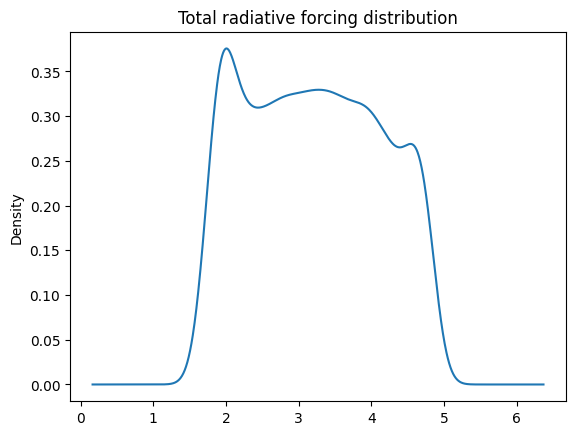

In [11]:
df_melted['total_radiative_forcing'].plot(kind='kde', title='Total radiative forcing distribution')

Here, we try to spot years that would be anormal.

In [12]:
df_2016 = df_melted[df_melted['time'] == 2015]
df_2016

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,damage
286,2015.0,BELGIUM,0.111852,10165.957787,2.117411,1.107462,1.050761,4.580816e+05,25320.161597,define_tot_eq_define_total_impact,1642.103273
287,2015.0,BULGARIA,0.111852,10165.957787,2.117411,0.912455,1.050761,4.934207e+04,4481.498197,define_tot_eq_define_total_impact,145.732944
288,2015.0,CROATIA,0.111852,10165.957787,2.117411,0.969999,1.050761,4.937873e+04,7742.439308,define_tot_eq_define_total_impact,155.038654
289,2015.0,CYPRUS,0.111852,10165.957787,2.117411,1.046096,1.050761,2.025158e+04,15209.898854,define_tot_eq_define_total_impact,68.573955
290,2015.0,CZECH REPUBLIC,0.111852,10165.957787,2.117411,0.997766,1.050761,1.862598e+05,9964.687822,define_tot_eq_define_total_impact,601.556523
...,...,...,...,...,...,...,...,...,...,...,...
11500,2015.0,INDIA,0.111852,10165.957787,2.117411,0.774343,1.050761,2.073712e+06,1033.161498,witness_tot_eq_witness_total_impact,10393.336353
11501,2015.0,LATAM,0.111852,10165.957787,2.117411,0.945113,1.050761,3.228709e+06,6137.085294,witness_tot_eq_witness_total_impact,19750.841878
11502,2015.0,RUSSIA,0.111852,10165.957787,2.117411,0.954282,1.050761,1.391604e+06,6690.368533,witness_tot_eq_witness_total_impact,8595.388659
11503,2015.0,USMCA,0.111852,10165.957787,2.117411,1.135555,1.050761,2.091227e+07,31676.133804,witness_tot_eq_witness_total_impact,153702.972542


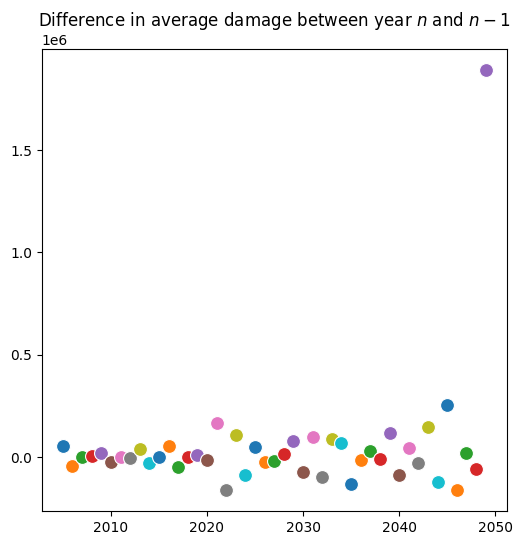

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

for year in range(2005, 2050):

    dif = df_melted.loc[df_melted['time'] == year+1, 'damage'].mean() - df_melted.loc[df_melted['time'] == year, 'damage'].mean()
    sns.scatterplot(x=[year], y=[dif], ax=ax, s=100, label=f'{year} - {year+1}', legend=False)


plt.title('Difference in average damage between year $n$ and $n-1$')
plt.show()

Since there is obviously something happening in 2015 and we do not understand why, we will remove the year 2015. 

In [14]:
#df_melted = df_melted[~df_melted['time'].isin([2015, 2043,  2048])] It disappeared in later runs

In [15]:
df_melted['coef'].describe()

count    5595.000000
mean        2.039068
std         3.982809
min         0.021691
25%         0.672309
50%         1.027231
75%         1.582395
max        47.991522
Name: coef, dtype: float64

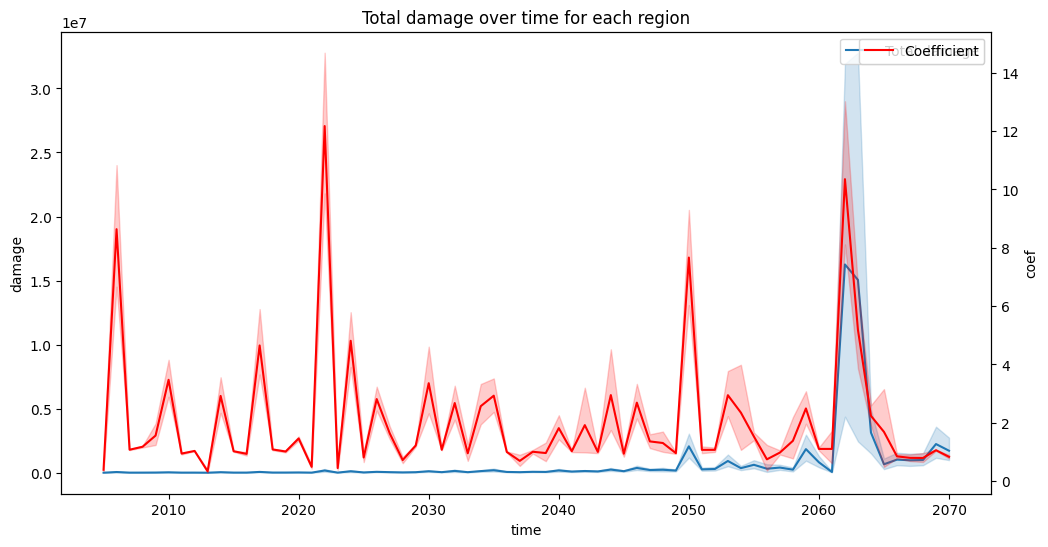

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))


#df_melted_grouped_region = df_melted.groupby(['time', 'REGIONS 35 I']).mean().reset_index()
sns.lineplot(data=df_melted, x='time', y='damage', legend=True, estimator='mean', ax=ax, label='Total damage')
ax2 = ax.twinx()
sns.lineplot(data=df_melted, x='time', y='coef', legend=True, estimator='mean', ax=ax2, color='red', label='Coefficient')

plt.title('Total damage over time for each region')
plt.legend()
#ax.set_yscale('log')

plt.show()  

### Checking where and when the damages are the higher

This step serves to check irregularities in the experimental setup. 

In [17]:
# Drop infinite values
infinites = df_melted[(df_melted['damage'] == np.inf) | (df_melted['damage'] == -np.inf)]
df_melted.replace([np.inf, -np.inf], np.nan, inplace=True)
infinites.size

0

### Creating the total_damage dataset

We want to compute the global level of damage, since this is how optimal level of emissions are calculated. 

In [55]:
df_melted.columns

Index(['time', 'REGIONS 35 I', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'total_radiative_forcing', 'coef',
       'temperature_change', 'gross_domestic_product_nominal',
       'average_disposable_income_per_capita', 'equation', 'damage'],
      dtype='object')

In [56]:
df_melted

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,damage
0,2005.0,BELGIUM,0.845784,47058.691018,1.714491,0.581072,0.845000,4.580816e+05,24767.399895,define_tot_eq_define_total_impact,5.454717e+02
1,2005.0,BULGARIA,0.845784,47058.691018,1.714491,0.131897,0.845000,4.934207e+04,4290.060541,define_tot_eq_define_total_impact,1.333681e+01
2,2005.0,CROATIA,0.845784,47058.691018,1.714491,0.213121,0.845000,4.937873e+04,7565.730576,define_tot_eq_define_total_impact,2.156579e+01
3,2005.0,CYPRUS,0.845784,47058.691018,1.714491,0.384869,0.845000,2.025158e+04,15217.411656,define_tot_eq_define_total_impact,1.597244e+01
4,2005.0,CZECH REPUBLIC,0.845784,47058.691018,1.714491,0.270972,0.845000,1.862598e+05,10050.031677,define_tot_eq_define_total_impact,1.034293e+02
...,...,...,...,...,...,...,...,...,...,...,...
13050,2070.0,INDIA,-0.173258,42595.512443,4.815545,1.867694,2.616576,9.733785e+06,1157.322384,witness_tot_eq_witness_total_impact,7.899529e+05
13051,2070.0,LATAM,-0.173258,42595.512443,4.815545,1.290907,2.616576,1.032892e+07,9756.778132,witness_tot_eq_witness_total_impact,5.793800e+05
13052,2070.0,RUSSIA,-0.173258,42595.512443,4.815545,0.755472,2.616576,5.034102e+07,214909.727770,witness_tot_eq_witness_total_impact,1.652548e+06
13053,2070.0,USMCA,-0.173258,42595.512443,4.815545,0.801547,2.616576,1.328959e+08,152707.707403,witness_tot_eq_witness_total_impact,4.628649e+06


In [62]:
# Aggregating the data to have one row per time and equation
damage_aggregated = df_melted.groupby(['time', 'equation']).agg({'damage': 'sum', 
                                                                 'gross_domestic_product_nominal': 'sum',
                                                                 'total_radiative_forcing': 'first', 
                                                                 'temperature_change': 'first', 
                                                                 'extra_extra_exponent' : 'first', 
                                                                 'extra_extra_normalisation_constant' : 'first'
                                                                 }).reset_index()

# Creating a dummy variable for the equation 
# Creating dummy variables for the equation
equation_dummies = pd.get_dummies(damage_aggregated['equation'], prefix='equation', drop_first=True)

# Concatenating the dummy variables back to the original dataframe
damage_aggregated = pd.concat([damage_aggregated, equation_dummies], axis=1)

# Renaming columns to simplify the analysis
damage_aggregated = damage_aggregated.rename(columns={'extra_extra_exponent': 'exponent', 'extra_extra_normalisation_constant': 'constant'})

damage_aggregated

,time,equation,damage,gross_domestic_product_nominal,total_radiative_forcing,temperature_change,exponent,constant,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,define_tot_eq_define_total_impact,5.929256e+04,7.153753e+07,1.714491,0.845000,0.845784,47058.691018,False,False
1,2005.0,dice_tot_eq_dice_total_impact,7.162551e+04,7.153753e+07,1.714491,0.845000,0.845784,47058.691018,True,False
2,2005.0,witness_tot_eq_witness_total_impact,1.210243e+05,7.153753e+07,1.714491,0.845000,0.845784,47058.691018,False,True
3,2006.0,define_tot_eq_define_total_impact,1.063262e+06,6.011960e+07,1.771211,0.864170,-2.057845,27579.330636,False,False
4,2006.0,dice_tot_eq_dice_total_impact,1.282744e+06,6.011960e+07,1.771211,0.864170,-2.057845,27579.330636,True,False
...,...,...,...,...,...,...,...,...,...,...
193,2069.0,dice_tot_eq_dice_total_impact,3.502939e+07,1.382135e+09,4.763925,2.584684,0.048377,47394.016848,True,False
194,2069.0,witness_tot_eq_witness_total_impact,6.384389e+07,1.382135e+09,4.763925,2.584684,0.048377,47394.016848,False,True
195,2070.0,define_tot_eq_define_total_impact,7.498757e+07,1.528983e+09,4.815545,2.616576,-0.173258,42595.512443,False,False
196,2070.0,dice_tot_eq_dice_total_impact,2.634244e+07,1.528983e+09,4.815545,2.616576,-0.173258,42595.512443,True,False


<Axes: xlabel='time', ylabel='damage'>

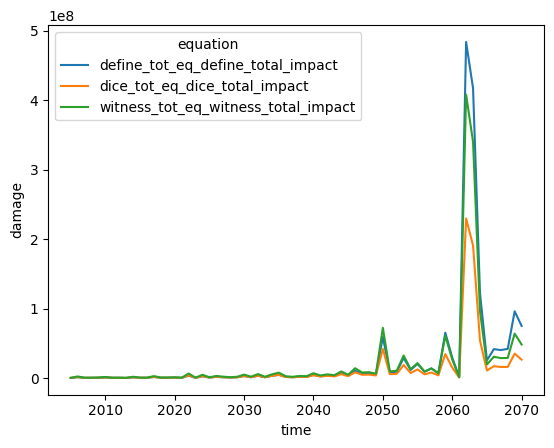

In [63]:
sns.lineplot(data=damage_aggregated, x='time', y='damage', hue='equation', estimator='mean')

In [67]:
damage_aggregated['log_exponent'] = np.log(damage_aggregated['exponent'])
damage_aggregated['log_damage'] = np.log(damage_aggregated['damage'])
damage_aggregated['log_constant'] = np.log(damage_aggregated['constant'])

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
import statsmodels.api as sm

# Préparer les variables indépendantes (X) et dépendante (y)
X = damage_aggregated[['temperature_change', 
                       'exponent', 
                       'constant']]

y = damage_aggregated['damage']

# Ajouter une constante (intercept) à X
X = sm.add_constant(X)

# Ajuster le modèle de régression OLS
model = sm.OLS(y, X).fit()

# Résumé des résultats
model.summary()
#print(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     24.48
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.77e-13
Time:                        09:57:08   Log-Likelihood:                -3805.0
No. Observations:                 198   AIC:                             7618.
Df Residuals:                     194   BIC:                             7631.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.108e+07   1.57e+07     -2.624      0.009    -7.2e+07   -1.02e+07
temperature_change  4.495e+07   7.46e+06      6.023      0.000    3.02e+07    5.97e+07
exponent            2.205e+07   3.89e+06      5.667      0.000    1.44e+07    2.97e+07
constant            -281.1427    334.618     -0.840      0.402    -941.100     378.814
==============================================================================
Omnibus:                      222.090   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6449.637
Skew:                           4.594   Prob(JB):                         0.00
Kurtosis:                      29.408   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exporting the datasets

In [68]:
# Save the dataframe to a csv file to access it from the other notebook
df_melted.to_csv('damage_country.csv', index=False)
damage_aggregated.to_csv('damage_aggregated.csv', index=False)